<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning/01_supervised_learning/model_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Model Evaluation

Evaluating a model goes far beyond accuracy. In this notebook, we will explore:
- Evaluation metrics for classification
- ROC curve and AUC
- Precision-Recall curve
- Cross-validation
- Handling imbalanced datasets


### **Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve,
    f1_score
)

sns.set(style="whitegrid")

### **Generate Imbalanced Dataset**

In [2]:
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=2,
    n_redundant=10,
    n_clusters_per_class=1,
    weights=[0.9, 0.1],
    flip_y=0,
    random_state=42
)

print("Class distribution:", np.bincount(y))

Class distribution: [900 100]


### **Train-Test Split**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### **Accuracy vs. F1-Score**

In [4]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("F1 Score:", f1)

Accuracy: 0.98
F1 Score: 0.8947368421052632


### **Confusion Matrix**

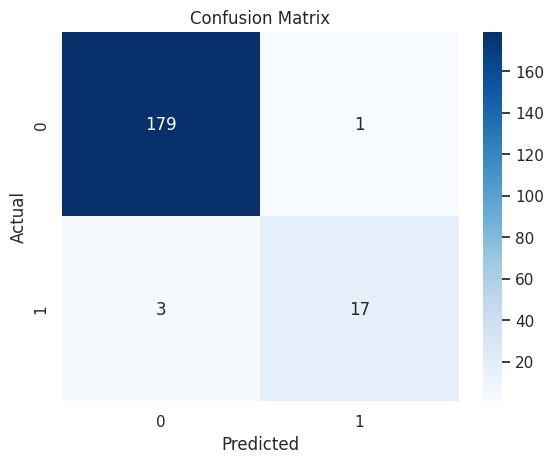

In [5]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### **ROC Curve and AUC**

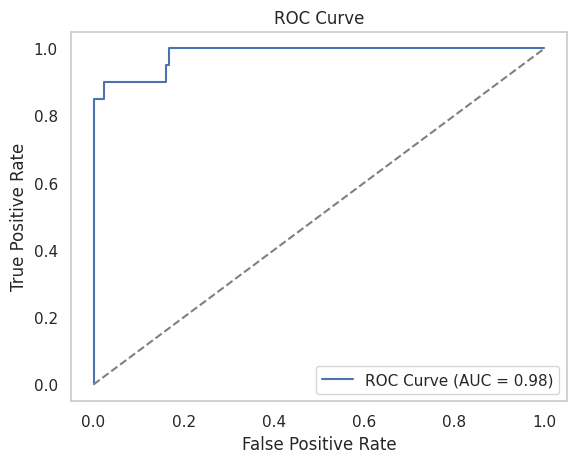

In [6]:
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

### **Precision-Recall Curve**

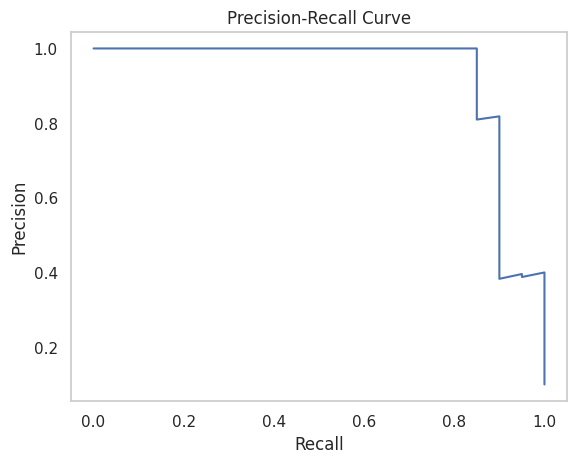

In [7]:
precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid()
plt.show()

### **Cross-Validation**

In [8]:
scores = cross_val_score(LogisticRegression(max_iter=1000), X, y, cv=5, scoring="f1")
print("Cross-validated F1 scores:", scores)
print("Mean F1 score:", scores.mean())

Cross-validated F1 scores: [0.88888889 0.89473684 0.82352941 0.86486486 0.94736842]
Mean F1 score: 0.8838776857352709


### **Summary**

- **Accuracy**: Misleading with imbalanced data.
- **F1-Score**: Best for uneven classes.
- **ROC-AUC**: Good for binary classification.
- **Precision-Recall Curve**: Best when the positive class is rare.
- **Cross-validation**: Helps avoid overfitting by testing across multiple splits.

**Next:** Try `clustering.ipynb` to perfect unsupervised learning.
